# ESE 527 Project_XLX

## Part 1 Import dataset and Define dataframe

In [85]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing

In [86]:
cols="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,
num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,
is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,
diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,
dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,
dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns = [c.strip() for c in cols.split(',')]
columns.append('target')

print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']
42


In [87]:
attacks_types = {'normal': 'normal','back': 'dos','buffer_overflow': 'u2r','ftp_write': 'r2l','guess_passwd': 'r2l',
'imap': 'r2l','ipsweep': 'probe','land': 'dos','loadmodule': 'u2r','multihop': 'r2l','neptune': 'dos','nmap': 'probe',
'perl': 'u2r','phf': 'r2l','pod': 'dos','portsweep': 'probe','rootkit': 'u2r','satan': 'probe','smurf': 'dos',
'spy': 'r2l','teardrop': 'dos','warezclient': 'r2l','warezmaster': 'r2l',
}


In [88]:
df=pd.read_csv("F:/Code Files/ESE 527/KDD_CUP99/raw/kddcup.data_10_percent",names=columns)

In [89]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

## Part 2 descriptive analysis

In [91]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [92]:
temp=df['target']
ple=le = preprocessing.LabelEncoder()
df['Target']=ple.fit_transform(temp).astype(np.int64)

In [93]:
df['Target'].value_counts().sort_values(ascending=False)

18    280790
9     107201
11     97278
0       2203
17      1589
5       1247
15      1040
21      1020
20       979
14       264
10       231
3         53
1         30
6         21
22        20
4         12
16        10
7          9
2          8
8          7
13         4
12         3
19         2
Name: Target, dtype: int64

In [94]:
df['attack_type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

In [95]:
df['attack_type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: attack_type, dtype: int64

In [96]:
temp2=df["attack_type"]
ple2 = preprocessing.LabelEncoder()
df["Attack_Type"]=ple2.fit_transform(temp2).astype(np.int64)

In [97]:
save_labels=df[['target','Target','attack_type','Attack_Type']]

In [98]:
save_labels.head()

,target,Target,attack_type,Attack_Type
0,normal.,11,normal,1
1,normal.,11,normal,1
2,normal.,11,normal,1
3,normal.,11,normal,1
4,normal.,11,normal,1


In [99]:
df.drop(columns=['Target', 'Attack_Type'],inplace=True)

In [100]:
df.shape

(494021, 43)

In [101]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [102]:
df['attack_type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: attack_type, dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

- show the distribution of categorical

In [104]:
df['attack_type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: attack_type, dtype: int64

<Axes: xlabel='attack_type', ylabel='count'>

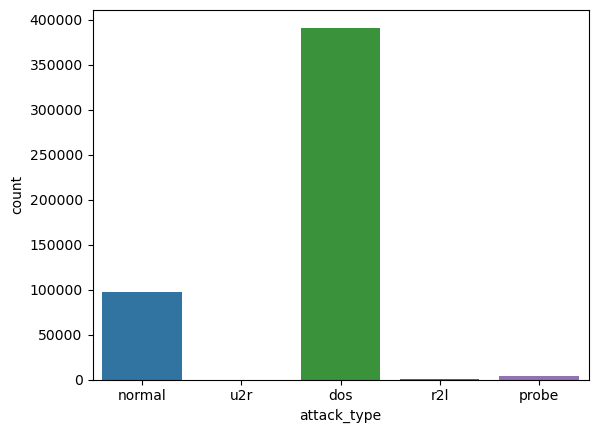

In [105]:
sns.countplot(x='attack_type', data=df)

In [106]:
num_cols = df._get_numeric_data().columns

In [107]:
list(set(df.columns)-set(num_cols))

['service', 'target', 'attack_type', 'protocol_type', 'flag']

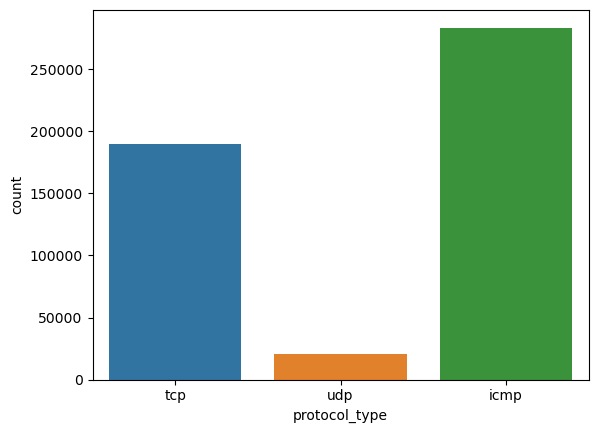

In [108]:
sns.countplot(x='protocol_type',data=df)
plt.show()

<Axes: xlabel='flag', ylabel='count'>

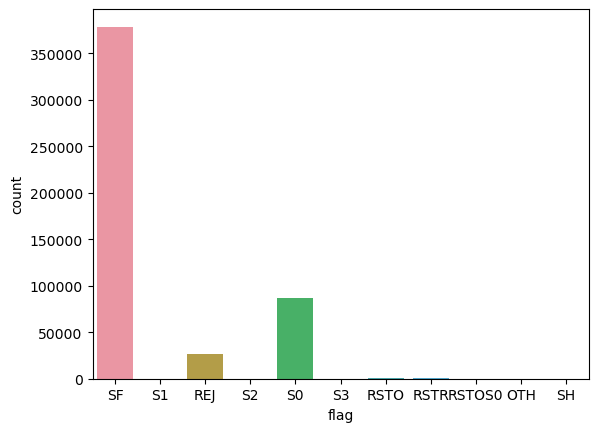

In [109]:
sns.countplot(x='flag',data=df)

<Axes: >

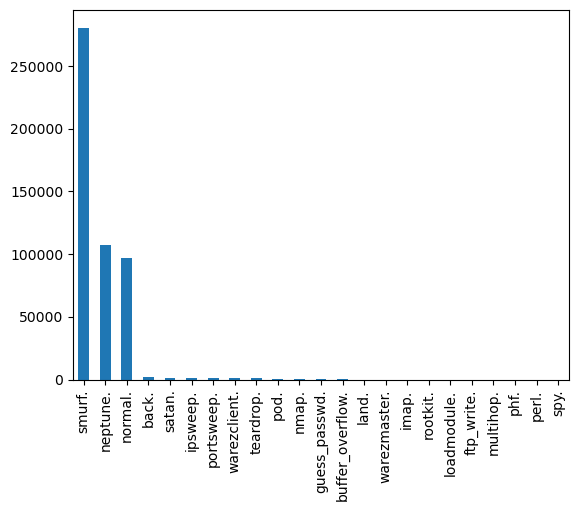

In [110]:
df['target'].value_counts().plot(kind="bar")

<Axes: >

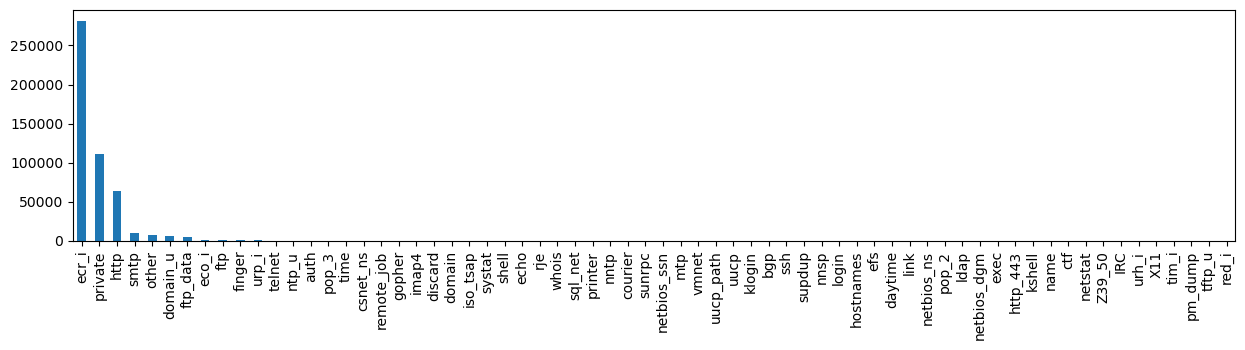

In [111]:
plt.figure(figsize=(15,3))
df['service'].value_counts().plot(kind="bar")

C:\Users\liyi7\AppData\Local\Temp\ipykernel_2200\1940942178.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


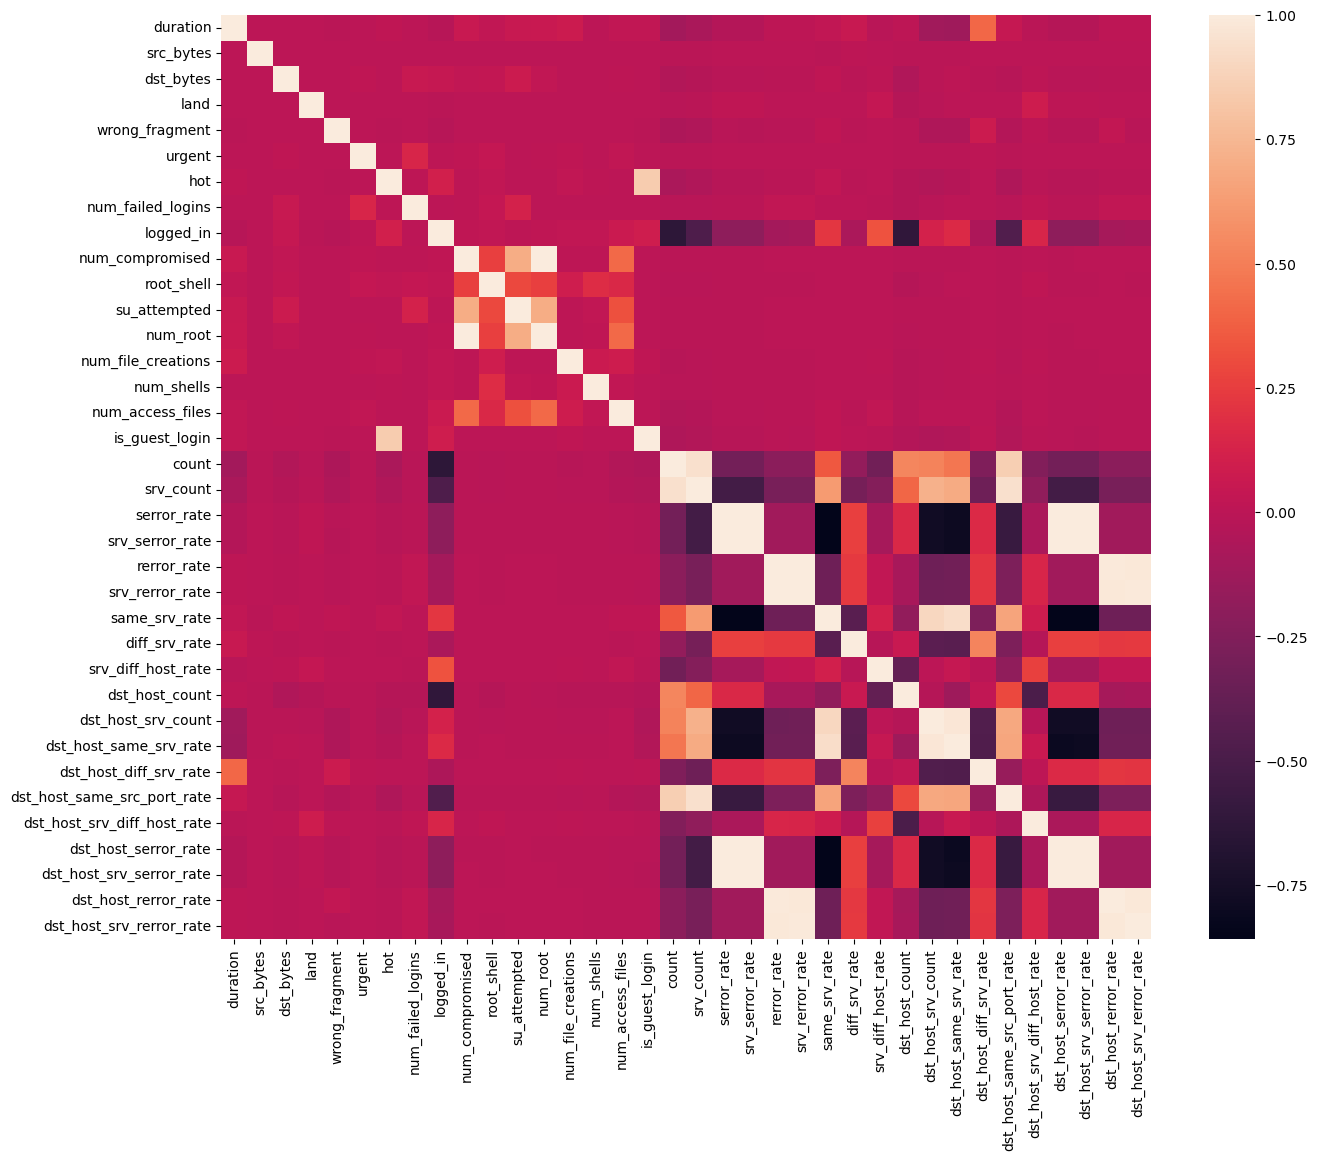

In [112]:
df = df[[col for col in df if df[col].nunique() > 1]]

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [113]:
columns_to_drop = [
    'num_root', 
    'srv_serror_rate', 
    'srv_rerror_rate', 
    'dst_host_srv_serror_rate', 
    'dst_host_serror_rate', 
    'dst_host_rerror_rate', 
    'dst_host_srv_rerror_rate', 
    'dst_host_same_srv_rate'
]
df.drop(columns=columns_to_drop, inplace=True)

In [114]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [115]:
df_c=df[['attack_type', 'service', 'flag', 'target', 'protocol_type']]

In [116]:
df_n = df.drop(columns=['attack_type', 'service', 'flag', 'target', 'protocol_type'])

In [117]:
df_n.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate'],
      dtype='object')

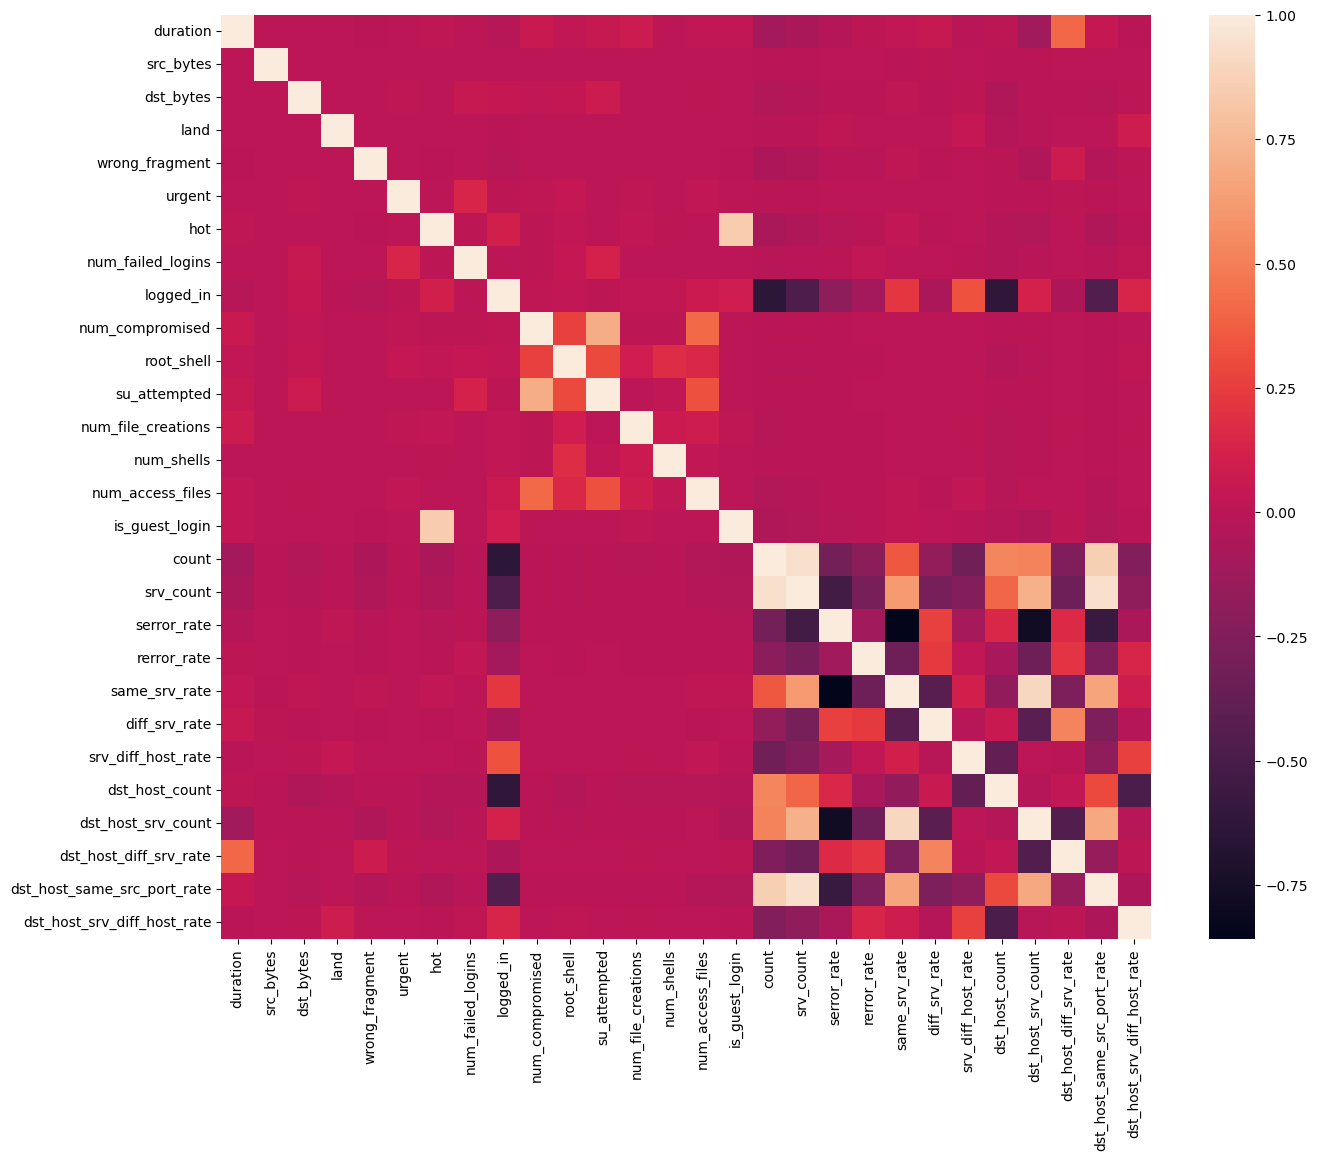

In [118]:
corr = df_n.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [119]:
columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 
           'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 'num_shells', 
           'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
           'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']

cor_matrix = df_n[columns].corr().abs()

upper_tri = cor_matrix.where(pd.np.triu(pd.np.ones(cor_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]


df_n= df_n.drop(columns=to_drop)



C:\Users\liyi7\AppData\Local\Temp\ipykernel_2200\2067768122.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  upper_tri = cor_matrix.where(pd.np.triu(pd.np.ones(cor_matrix.shape), k=1).astype(bool))


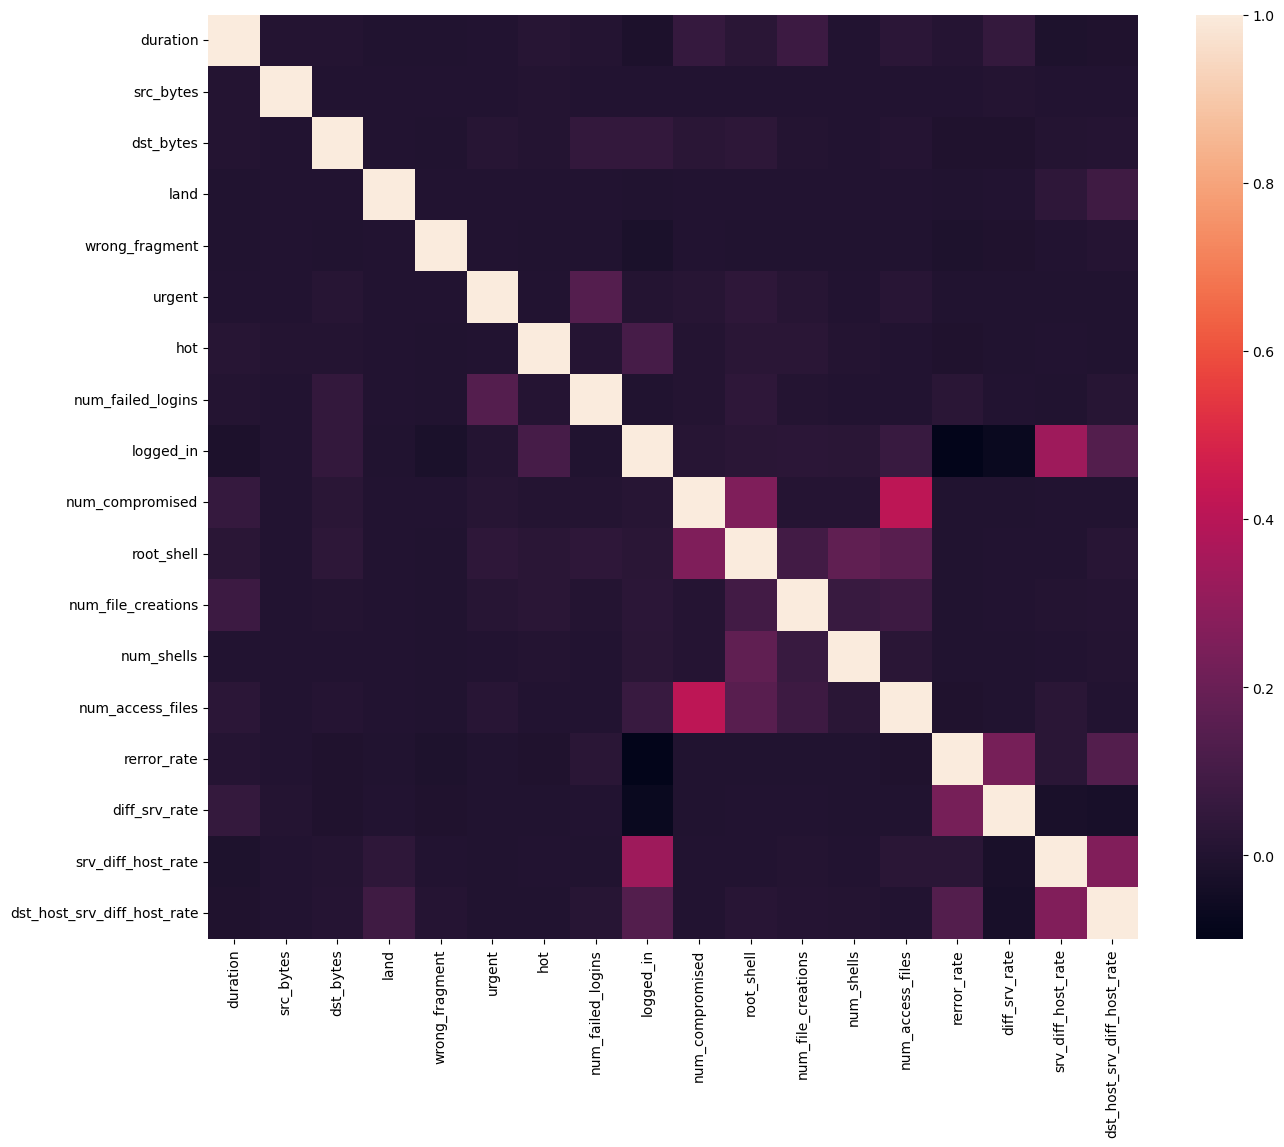

In [120]:
corr = df_n.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [121]:
df_n.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'num_file_creations', 'num_shells', 'num_access_files',
       'rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_srv_diff_host_rate'],
      dtype='object')

In [122]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   src_bytes                    494021 non-null  int64  
 2   dst_bytes                    494021 non-null  int64  
 3   land                         494021 non-null  int64  
 4   wrong_fragment               494021 non-null  int64  
 5   urgent                       494021 non-null  int64  
 6   hot                          494021 non-null  int64  
 7   num_failed_logins            494021 non-null  int64  
 8   logged_in                    494021 non-null  int64  
 9   num_compromised              494021 non-null  int64  
 10  root_shell                   494021 non-null  int64  
 11  num_file_creations           494021 non-null  int64  
 12  num_shells                   494021 non-null  int64  
 13 

In [123]:
df_n_names=df_n.columns.values
df_c_names=df_c.columns.values

In [124]:
df_n=df[df_n_names]
df_c=df[df_c_names]

## Part 3 outlier detection

In [125]:
from sklearn.preprocessing import MinMaxScaler

# 假设您的数据框是df_n
features = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
            'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
            'root_shell', 'num_file_creations', 'num_shells', 'num_access_files',
            'rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_diff_host_rate']

# 复制原始数据框
df_scaled = df_n.copy()

# 初始化MinMaxScaler
scaler = MinMaxScaler()

# 使用scaler进行转换
df_scaled[features] = scaler.fit_transform(df_scaled[features])


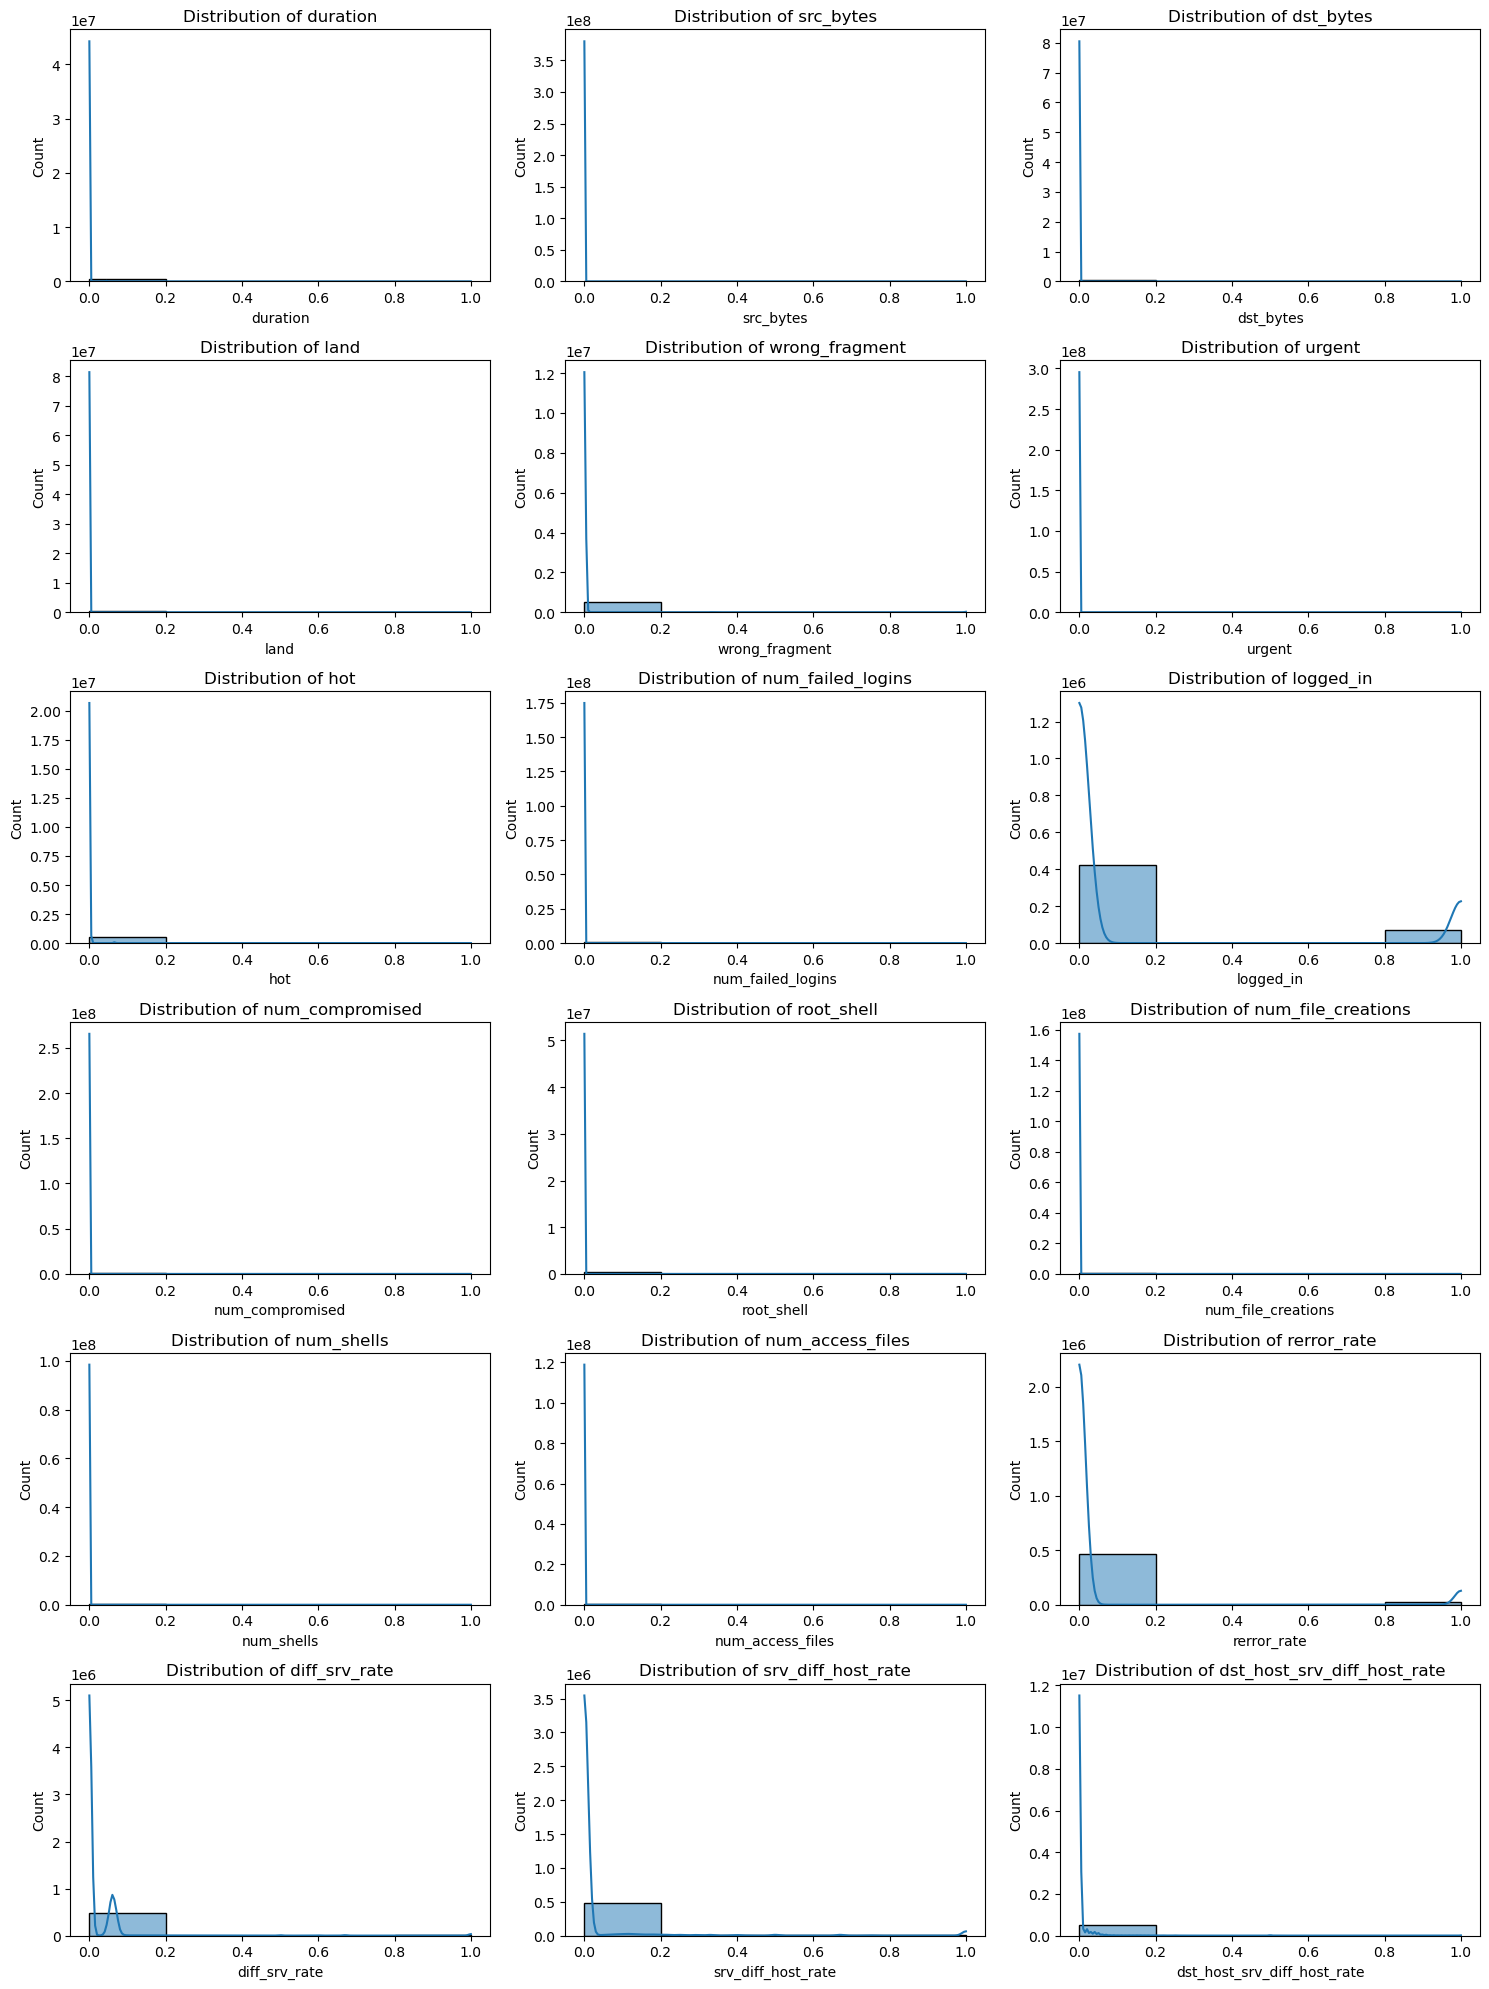

In [126]:
features = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
            'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
            'root_shell', 'num_file_creations', 'num_shells', 'num_access_files',
            'rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_diff_host_rate']

# 设置画布大小和子图布局
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 3, i)  # 假设您希望每行有3个子图
    sns.histplot(df_scaled[feature], kde=True, bins=5)  # 使用histplot代替已过时的distplot
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.tight_layout()  # 确保子图之间的间距合适

plt.show()

- method 1 screen out some outliers by using value_counts and if condition

In [127]:
columns_to_check = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
                    'root_shell', 'num_file_creations', 'num_shells', 'num_access_files',
                    'rerror_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_diff_host_rate']


mask_to_remove = pd.Series([False] * len(df_n), index=df_n.index)

for col in columns_to_check:
    value_counts = df_n[col].value_counts()
    to_remove = value_counts[value_counts < 10].index
    mask_to_remove |= df_n[col].isin(to_remove)


df_n = df_n[~mask_to_remove]


In [128]:
df_n.shape

(460086, 18)

- method 2 using 3-σ

In [129]:
for col in df_n.columns:
    sigma3_l = df_n[col].quantile(0.0015)
    sigma3_r = df_n[col].quantile(0.9985)
    

    mask = ~((df_n[col] < (sigma3_l)) | (df_n[col] > (sigma3_r)))
    df_n = df_n[mask]

In [130]:
df_n.shape

(457348, 18)

In [131]:
cols_to_drop = [col for col in df_n.columns if df_n[col].nunique() == 1]
df_n = df_n.drop(columns=cols_to_drop)

In [132]:
df_n.shape

(457348, 11)

In [133]:
df_n.head()

,duration,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_srv_diff_host_rate
1,0,239,486,0,0,1,0,0.0,0.0,0.0,0.00
2,0,235,1337,0,0,1,0,0.0,0.0,0.0,0.00
3,0,219,1337,0,0,1,0,0.0,0.0,0.0,0.00
11,0,177,1985,0,0,1,0,0.0,0.0,0.0,0.04
12,0,222,773,0,0,1,0,0.0,0.0,0.0,0.04


In [134]:
features=df_n.columns.values

In [135]:
df_scaled_after = df_n.copy()

# 初始化MinMaxScaler
scaler = MinMaxScaler()

# 使用scaler进行转换
df_scaled_after[features] = scaler.fit_transform(df_scaled_after[features])

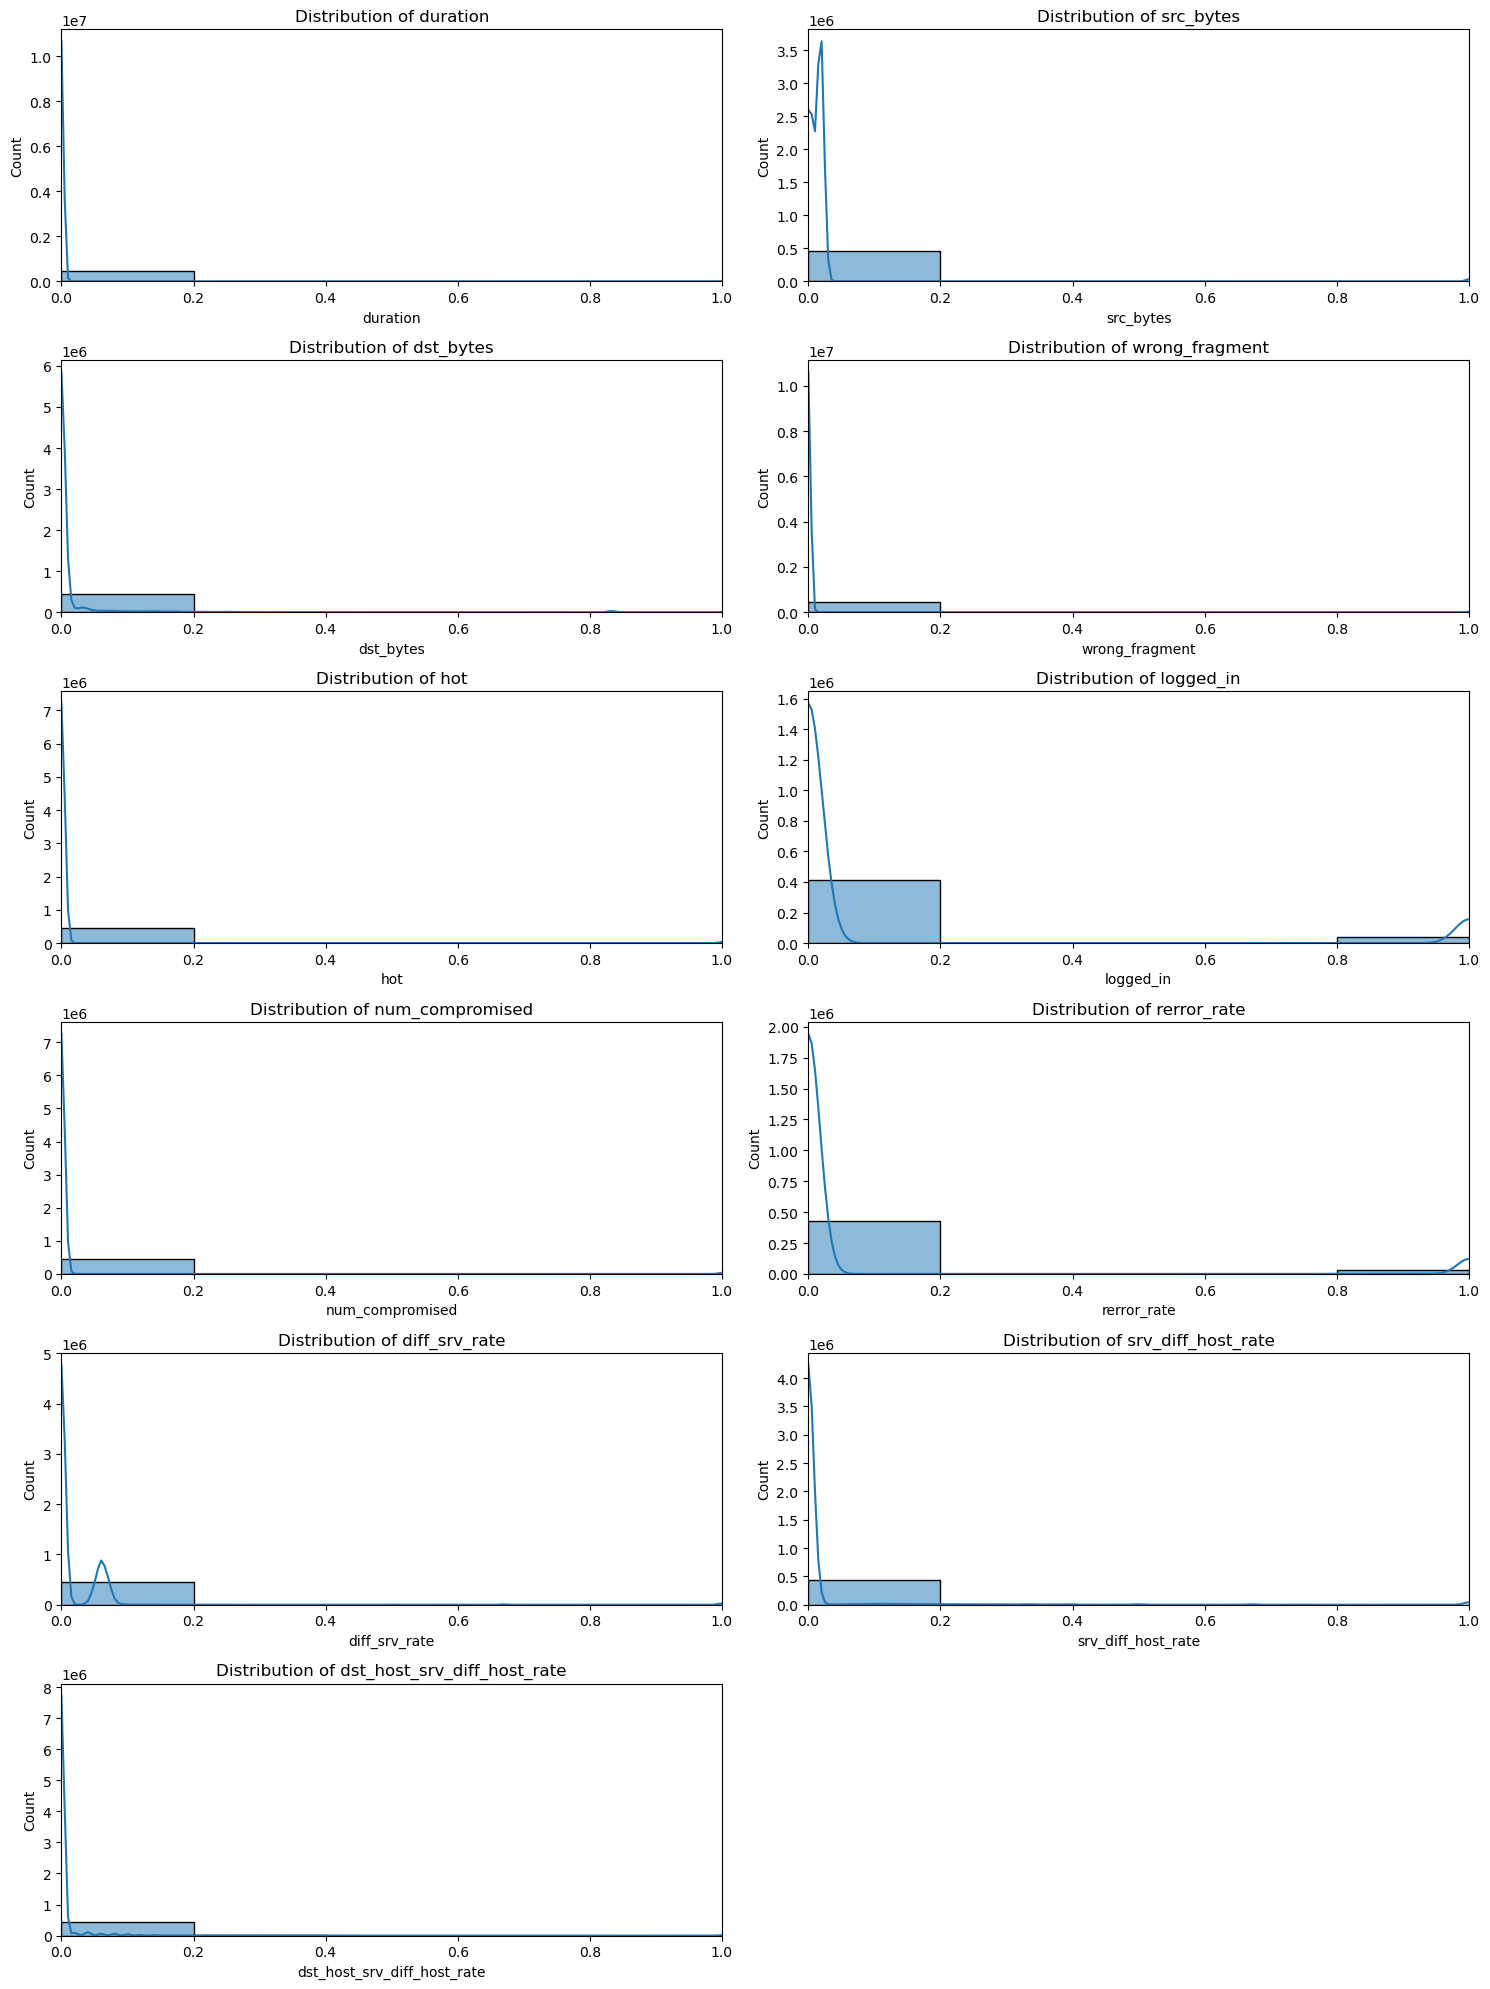

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 2, i)  
    sns.histplot(df_scaled_after[feature], kde=True, bins=5)  # 使用更多的bins以获得更好的可视效果
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.xlim(0, 1)  # 设置x轴的限制为[0, 1]
    plt.tight_layout()  # 确保子图之间的间距合适

plt.show()


In [137]:
df = pd.concat([df_n, df_c.loc[df_n.index]], axis=1)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457348 entries, 1 to 494014
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     457348 non-null  int64  
 1   src_bytes                    457348 non-null  int64  
 2   dst_bytes                    457348 non-null  int64  
 3   wrong_fragment               457348 non-null  int64  
 4   hot                          457348 non-null  int64  
 5   logged_in                    457348 non-null  int64  
 6   num_compromised              457348 non-null  int64  
 7   rerror_rate                  457348 non-null  float64
 8   diff_srv_rate                457348 non-null  float64
 9   srv_diff_host_rate           457348 non-null  float64
 10  dst_host_srv_diff_host_rate  457348 non-null  float64
 11  attack_type                  457348 non-null  object 
 12  service                      457348 non-null  object 
 13 

In [139]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot',
       'logged_in', 'num_compromised', 'rerror_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_srv_diff_host_rate', 'attack_type',
       'service', 'flag', 'target', 'protocol_type'],
      dtype='object')

In [140]:
names=df.columns.values

In [141]:

for i in names:
    print(f"列名: {i}")
    print(df[i].value_counts())
    print("------")


列名: duration
0       453475
1          733
2630       496
5          344
14         301
2          266
3          222
4          183
10         106
7           96
2620        84
2625        82
2594        71
12          68
9           57
6           56
16          49
11          48
19          47
13          35
2593        34
15          33
8           32
2470        32
2350        30
2450        28
1995        23
2474        22
20          18
2420        17
18          17
2000        16
2472        15
27          15
2592        15
22          14
2595        14
28          13
23          11
2586        11
24          11
2585        10
1470        10
2465        10
21          10
2540        10
17          10
46           6
37           5
26           5
30           5
25           5
29           5
35           4
32           3
38           3
31           2
41           2
33           2
45           1
Name: duration, dtype: int64
------
列名: src_bytes
1032     228034
0        115041
520  

In [142]:
pmap={'icmp':0,'tcp':1,'udp':2}
df['protocol_type']=df['protocol_type'].map(pmap)

In [143]:
fmap={'SF':0,'S0':1,'REJ':2,'RSTR':3,'RST0':4,'SH':5,'S1':6,'S2':7,'RST0S0':8,'S3':9,'OTH':10}
df['flag']=df['flag'].map(fmap)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457348 entries, 1 to 494014
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     457348 non-null  int64  
 1   src_bytes                    457348 non-null  int64  
 2   dst_bytes                    457348 non-null  int64  
 3   wrong_fragment               457348 non-null  int64  
 4   hot                          457348 non-null  int64  
 5   logged_in                    457348 non-null  int64  
 6   num_compromised              457348 non-null  int64  
 7   rerror_rate                  457348 non-null  float64
 8   diff_srv_rate                457348 non-null  float64
 9   srv_diff_host_rate           457348 non-null  float64
 10  dst_host_srv_diff_host_rate  457348 non-null  float64
 11  attack_type                  457348 non-null  object 
 12  service                      457348 non-null  object 
 13 

In [145]:
df['service'].value_counts()

ecr_i       281353
private     110711
http         40728
domain_u      5607
ftp_data      4282
             ...  
tim_i            7
IRC              4
X11              2
tftp_u           1
red_i            1
Name: service, Length: 65, dtype: int64

In [146]:
df.drop('service',inplace=True,axis=1)

In [147]:
df.drop('target',inplace=True,axis=1)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457348 entries, 1 to 494014
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     457348 non-null  int64  
 1   src_bytes                    457348 non-null  int64  
 2   dst_bytes                    457348 non-null  int64  
 3   wrong_fragment               457348 non-null  int64  
 4   hot                          457348 non-null  int64  
 5   logged_in                    457348 non-null  int64  
 6   num_compromised              457348 non-null  int64  
 7   rerror_rate                  457348 non-null  float64
 8   diff_srv_rate                457348 non-null  float64
 9   srv_diff_host_rate           457348 non-null  float64
 10  dst_host_srv_diff_host_rate  457348 non-null  float64
 11  attack_type                  457348 non-null  object 
 12  flag                         456828 non-null  float64
 13 

# model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

- logistic regression

In [2]:
df=pd.read_csv("F:/Code Files/ESE 527/df_processed.csv")
df=df.drop("Unnamed: 0",axis=1)
u2r_rows = df[df['attack_type'] == 'u2r'].index
df = df.drop(u2r_rows)

In [3]:
y = pd.factorize(df['attack_type'])[0]

X = df.drop('attack_type', axis=1)

In [4]:

imputer = SimpleImputer(strategy='mean')  
X_imputed = imputer.fit_transform(X)

X_imputed += 1

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     12405
           1       0.99      1.00      1.00     78244
           2       0.93      0.64      0.76       689
           3       0.81      0.52      0.63       132

    accuracy                           0.99     91470
   macro avg       0.93      0.78      0.84     91470
weighted avg       0.99      0.99      0.99     91470



In [11]:
df=pd.read_csv("F:/Code Files/ESE 527/df_processed.csv")
df=df.drop("Unnamed: 0",axis=1)
u2r_rows = df[df['attack_type'] == 'u2r'].index
df = df.drop(u2r_rows)

In [12]:
y = pd.factorize(df['attack_type'])[0]
X = df.drop('attack_type', axis=1)

imputer = SimpleImputer(strategy='mean')  
X_imputed = imputer.fit_transform(X)
X_imputed += 1


X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

In [14]:
param_grid = {
    'C': [ 0.1, 1],
    'solver': ['lbfgs', 'liblinear','saga']
}


log_reg = LogisticRegression(max_iter=1000,n_jobs=-1)

grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='roc_auc_ovr',n_jobs=-1)
grid_search.fit(X_train, y_train)  


best_params = grid_search.best_params_
print('Best parameters found:', best_params)




Best parameters found: {'C': 1, 'solver': 'lbfgs'}


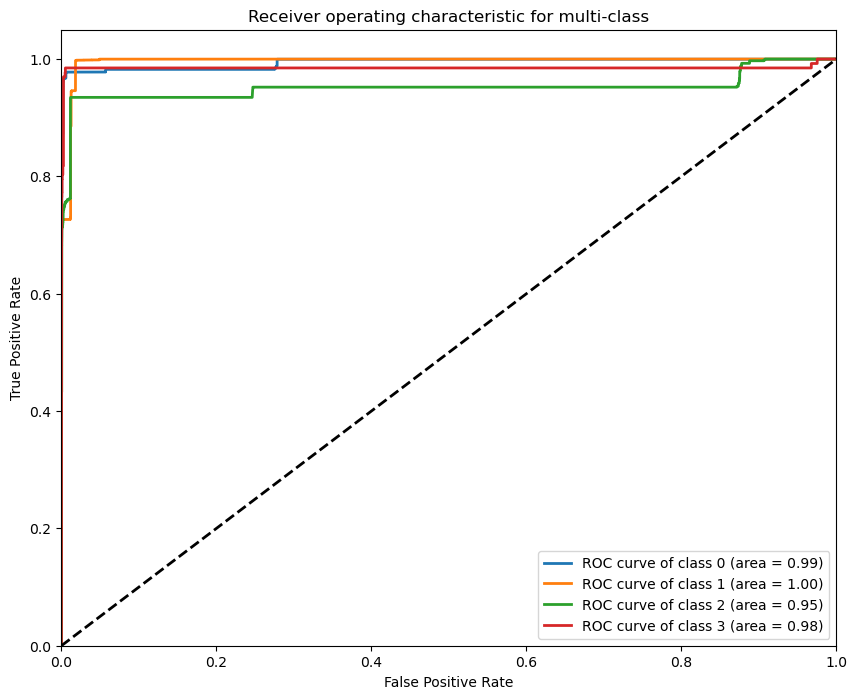

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     12405
           1       0.99      1.00      1.00     78244
           2       0.93      0.64      0.76       689
           3       0.81      0.52      0.63       132

    accuracy                           0.99     91470
   macro avg       0.93      0.78      0.84     91470
weighted avg       0.99      0.99      0.99     91470



In [15]:

best_log_reg = LogisticRegression(max_iter=1000, **best_params)
best_log_reg.fit(X_train, y_train)
y_score = best_log_reg.predict_proba(X_test)


y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()


y_pred = best_log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

In [16]:

imputer = SimpleImputer(strategy='mean')  
X_imputed = imputer.fit_transform(X)


X_imputed += 1


X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [19]:
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

In [20]:
param_grid = {
    'C': [ 0.1, 1],
    'solver': ['lbfgs', 'liblinear','saga']
}

# 初始化Logistic回归模型
log_reg = LogisticRegression(max_iter=1000,n_jobs=-1)

# 使用网格搜索进行交叉验证
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='roc_auc_ovr',n_jobs=-1)
grid_search.fit(X_train, y_train)  # 使用原始的 y_train，不需要转换为二进制指示矩阵

# 输出最佳参数组合
best_params = grid_search.best_params_
print('Best parameters found:', best_params)

# 使用最佳参数组合训练模型

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.
  warnings.warn(


Best parameters found: {'C': 0.1, 'solver': 'liblinear'}


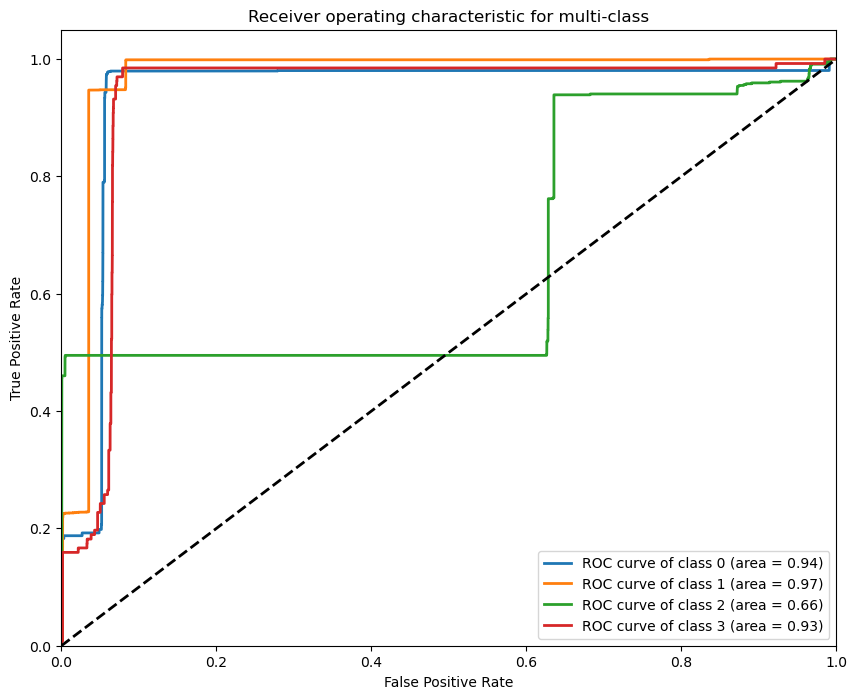

              precision    recall  f1-score   support

           0       0.60      0.50      0.54     12405
           1       0.99      0.95      0.97     78244
           2       0.79      0.71      0.75       689
           3       0.02      0.96      0.04       132

    accuracy                           0.88     91470
   macro avg       0.60      0.78      0.58     91470
weighted avg       0.93      0.88      0.91     91470



In [21]:
# 计算测试集的预测概率
best_log_reg = LogisticRegression(max_iter=1000, **best_params)
best_log_reg.fit(X_train, y_train)
y_score = best_log_reg.predict_proba(X_test)

# 由于这是多类问题，我们需要为每个类别计算ROC曲线和AUC
# ROC曲线的计算需要y_test是二进制指示矩阵
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# 计算每个类别的ROC曲线和AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制所有ROC曲线
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

# 输出分类报告
y_pred = best_log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

In [18]:

log_reg = LogisticRegression(max_iter=1000)  


log_reg.fit(X_train_smote, y_train_smote)


y_pred = log_reg.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79     12405
           1       1.00      0.95      0.97     78244
           2       0.42      0.94      0.58       689
           3       0.22      0.98      0.35       132

    accuracy                           0.94     91470
   macro avg       0.59      0.94      0.67     91470
weighted avg       0.95      0.94      0.94     91470



- random forest

In [3]:
df=pd.read_csv("F:/Code Files/ESE 527/df_processed.csv")
df=df.drop("Unnamed: 0",axis=1)
u2r_rows = df[df['attack_type'] == 'u2r'].index
df = df.drop(u2r_rows)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [5]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['attack_type'])

# 分离特征和目标变量
X = df.drop('attack_type', axis=1)
imputer = SimpleImputer(strategy='mean')  # 使用平均值填充NaN
X_imputed = imputer.fit_transform(X)
# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 初始化随机森林模型
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# 拟合模型到训练数据
rf_classifier.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_classifier.predict(X_test)

# 输出分类报告
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     78244
           1     0.9986    0.9999    0.9993     12405
           2     1.0000    0.9797    0.9897       689
           3     1.0000    0.9773    0.9885       132

    accuracy                         0.9998     91470
   macro avg     0.9997    0.9892    0.9944     91470
weighted avg     0.9998    0.9998    0.9998     91470



In [6]:
df=pd.read_csv("F:/Code Files/ESE 527/df_processed.csv")
df=df.drop("Unnamed: 0",axis=1)
u2r_rows = df[df['attack_type'] == 'u2r'].index
df = df.drop(u2r_rows)

In [7]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['attack_type'])

X = df.drop('attack_type', axis=1)
imputer = SimpleImputer(strategy='mean')  # 使用平均值填充NaN
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [8]:
param_grid = {
    'n_estimators': [10, 15, 20],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,6,8,10]
}

# Create a base model
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}


              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     78244
           1     0.9986    0.9999    0.9992     12405
           2     1.0000    0.9826    0.9912       689
           3     0.9921    0.9470    0.9690       132

    accuracy                         0.9998     91470
   macro avg     0.9976    0.9824    0.9899     91470
weighted avg     0.9998    0.9998    0.9998     91470



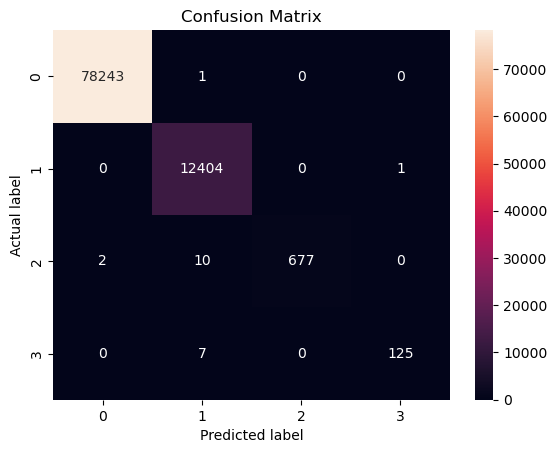

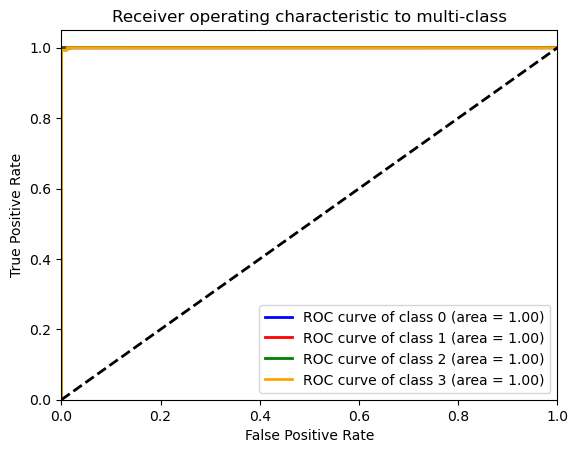

In [9]:
# Use the best estimator for making predictions
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

# Use the best estimator for making predictions
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, digits=4))

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Calculating AUC for multi-class
y_prob = best_grid.predict_proba(X_test)

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'orange', 'black', 'purple', 'brown', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()